# 데이터 분석 프로세스
### 1. 수집

데이터(정형/비정형/반정형) 수집

### 2. 탐색(EDA)
데이터 특징 파악
- 도표, 그래프, 통계...

### 3. 전처리
분석에 적합한 형태로 손질
 ex) 이상치 제거, 결측치 처리, 노이즈 제거

### 4. 모델링

# EDA
- 시각화 도구 통해 패턴 발견
- 데이터 특이성 확인
- 통계/그래프로 가설 검정

으로 주어진 데이터에 대해 알아보는 것

### (1) 대상
1) 일변량   
EDA를 통해 한 번에 파악하려는 변수가 **한 개**   
데이터를 설명, 패턴 찾기가 목적

2) 다변량   
EDA 통해 한 번에 파악하려는 변수 **여러 개**   
여러 변수 간의 관계 파악   
* 변수 확인 전 개별 데이터 먼저 파악

### (2) 종류

1. 시각화   
대략적인 형태 파악

2. 비시각화   
주로 Summary Statistics, 정확한 값



# 데이터 확인
읽기: 데이터 불러오기   
쓰기: 데이터 생성

### (1) 절대경로/상대경로
```
pd.read_csv("파일경로/파일이름.csv")
```

1. 절대 경로   
처음(root 파일)->목적지까지 전체적 경로(URL).  
ex) C:/users/사용자 이름/OneDrive/Desktop

2. 상대 경로   
현재 작업 디렉터리 기준 상대적 표현 경로   
- **./** 현재 디렉터리
- **../** 상위 디렉터리
- **/** 최상위 디렉터리

### (2) 데이터 입출력
|포맷|Reader|Writer|
|------|---|---|
|CSV|read_csv|to_csv|
|EXCEL|read_excel|to_excel|

read_**, to_** (JSON, HTML, SQL...)


### (3) CSV / EXCEL

1. CSV
데이터를 쉼표로 구분하는 텍스트 파일   
크기 작고 압축 용이

2. EXCEL
행과 열이 데이터프레임으로 일대일 대응   
(파일 경로, sheet_name='불러올 시트')

# 데이터셋 파악

### (1) 데이터 프레임 보기

head(n): 데이터 프레임 상위 n개 데이터 보여 줌

### (2) 변수 확인

변수= 데이터 프레임의 column=feature
> 1. 변수 정의 확인   
> 어떤 정보 가지는 변수인지
> 2. 변수 유형 확인   
> 질적/범주형과 양적/수치형으로 구분
> 3. 변수 데이터 형식 확인

**데이터의 종류**
|**범주형**   몇 개의 범주로 나누어진 데이터|**수치형**   숫자로 표현되는 데이터|
|------|------|
|**명목형**   성별, 혈액형 등 순서 상관없이 이름만 의미 부여 가능|**이산형**   이산적인 값, (셈이) 정수 단위로 떨어져서 셀 수 있는 데이터|
|**순서형**   어떤 기준에 따라 순서에 의미 부여 가능|**연속형**   연속적 값 가짐|

### (3) 데이터 분포 확인

단변수 분석
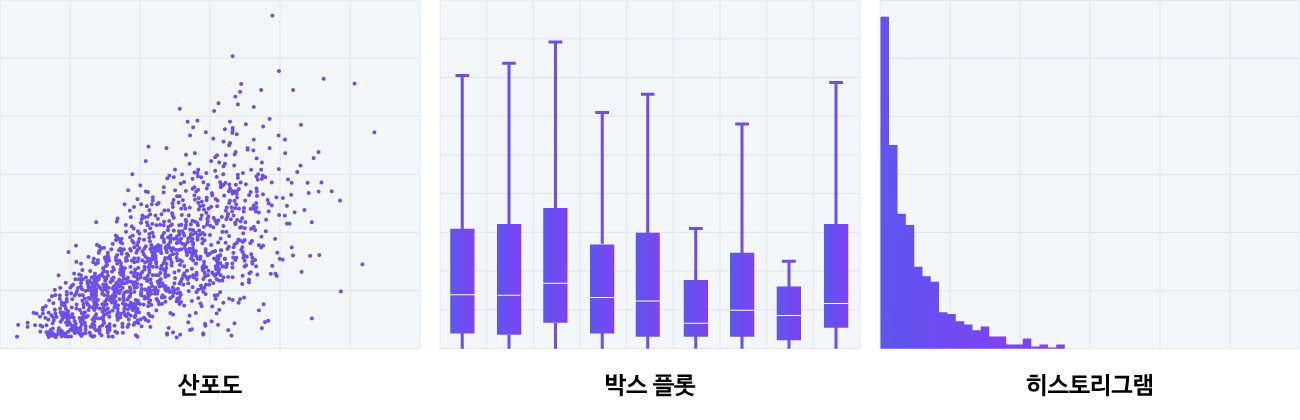

# 전처리

데이터를 분석에 적합한 형태로 만드는 과정

### (1) 결측값 처리
결측값? 데이터 수집 과정에서 측정되지 않거나 누락된 데이터

1. 결측값 확인   
NaN, ?, 0 확인

**Pandas func**
- info(): 데이터프레임 요약 정보 출력 -> 유효값 개수 보여 줌
- value_counts(dropna=False): 결측값 포함 전체 데이터 확인
- isnull(): 누락 데이터=True.  
df.isnull().sum()
- notnull(): 유효값=True
- replace(): 결측값 0, ? -> NaN

2. 결측값 처리

a. 삭제
```python
DataFrame.dropna(axis=0/1, how='any'/'all', subset=[col1, col2, ...], inplace=True/False)
```




b. 대체   
평균값, 최빈값 등의 대표값 활용  
- 일괄 대체: 모든 변수 일괄적 같은 값으로 대체   
- 유사 유형 대체: 범주형 변수 활용해 유사 범주에 따라 다른 값으로 대체

**fillna()** 결측값 대체

**일괄 대체**
```python
a = df["열1"].mean(axis=0)
df["열1"].fillna(a, inplace=True)
```

**유사 유형 대체**
```python
category_means = df.groupby('Category')['Value'].mean()

df['Value'] = df.groupby('Category')['Value'].apply(lambda x: x.fillna(x.mean()))
```

### (2) 이상치 처리
이상치? 관측된 데이터 범위에서 많이 벗어난 값

1. 이상치 확인   
a. 통계로 확인 describe()

b. 시각화로 확인 boxplot

c. Z-score로 확인   
데이터를 평균(0), 표준편차(1)로 정규화    
:평균으로부터 얼마나 떨어져있는지   
- 평균에 가까울수록 0에 가깝고 멀어질수록 Z-score 커짐  
- Z-score 특정 기준값 넘어가는 데이터를 이상치로 간주

d. Tuckey Fences로 확인   
: 사분위 범위(IQR: 중간 50% 범위 측정) 기반으로 두 가지 경우를 이상치로 판단   
- Q1-(1.5*IQR) 미만   
- Q3+(1.5*IQR) 초과

### (2) 이상치 제거 및 처리
1. 전체 삭제
- Human error에 의해 발생한 경우 해당 관측치 삭제

2. 다른 값으로 대체
- 관측치 숫자가 작으면 다른 값으로 대체 or 이상값 예측 or 다른 변수 사용해서 예측 모델 제작

3. 변수화
- 자연 발생 시 이상값에 대해 파악, 변수화

4. 리샘플링
- 자연 발생 시 이상값 분리해서 모델 제작
- 이상값 포함/제외 모델 각각 제작

-> 자연 발생 시 별다른 특이점 없다면 케이스 분리 후 분석

### (3) 피처 엔지니어링 (변수 가공)
해결하고자 하는 문제를 컴퓨터가 이해할 수 있도록 변수 형태 변형 및 처리


**피처 엔지니어링 방식**

1) **레이블인코딩**, **원핫인코딩:** 문자열 값들을 숫자형으로 변경하는 작업
- 레이블인코딩   
범주형 변수를 0부터 N-1까지의 숫자로 변환
- 원핫 인코딩   
범주형 변수를 이진 벡터로 변환
```
pd.get_dummise(df, columns=[컬럼 리스트])
```

2) **구간화(Binning)**: 연속적인 값을 일정한 구간(Bin)으로 구분
```
pd.cut(df['컬럼명'], bins=[구분 기준 리스트], labels=[지정할 label])
```

3) **파생변수 생성**: 기존의 피처를 변환해 새로운 피처 생성

4) **스케일링**: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업   
이상치 제거 -> 정규화

a. StandardScaler()   
각 feature 평균: 0   
분산: 1
-> 모두 같은 스케일 갖게 됨, 정규분포 따른다고 가정하는 기술에 적합

b. MinMaxScaler()
모든 feature가 0과 1 사이에 위치하게 만듦   
-> 같은 비율로 속성 맞춤, 연산 속도 높이고 알고리즘 최적화

by sklearn 라이브러리...


# 데이터 시각화
- 일반적으로 Matplotlib과 Seaborn 사용   
- 시각화 전 데이터 파악 (범주형/수치형, 결측값/이상치 확인)

### 파라미터
매개변수: 함수의 입력값    
countplot(data*파라미터*=data, x='survived'*인자*)

**hue** 범주형 변수를ㄹ 넣어 데이터 구분하여 그래프에 표시 가능

## 다양한 그래프

### boxplot
사분위수와 이상치 나타냄    
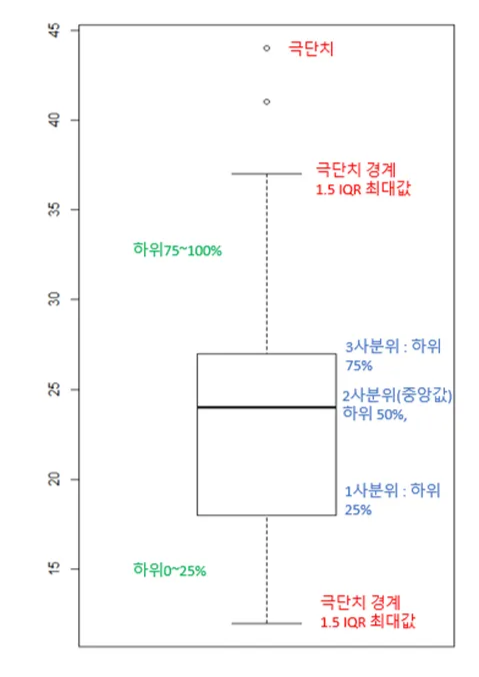

### countplot
범주형 변수의 빈도수 확인   
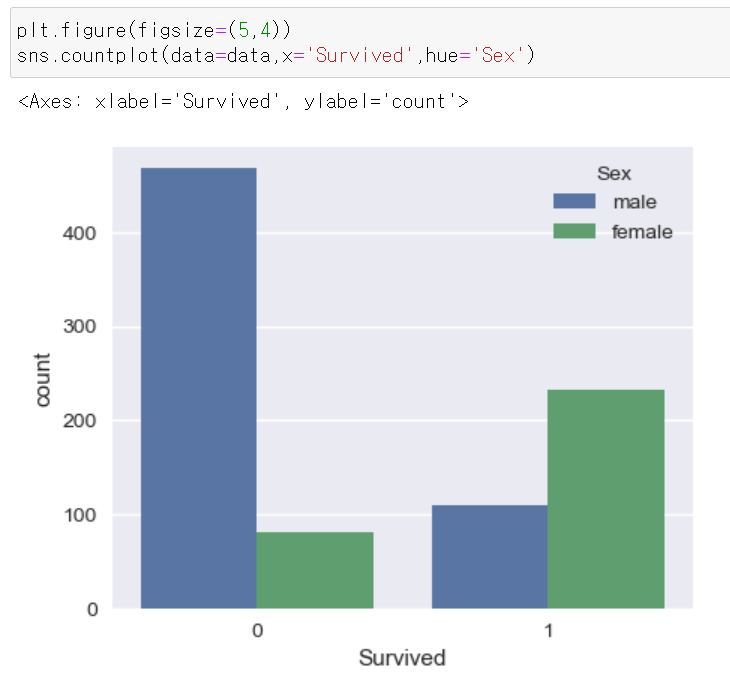

### histplot
도수분포표: 수치형 변수의 구간별 빈도수   
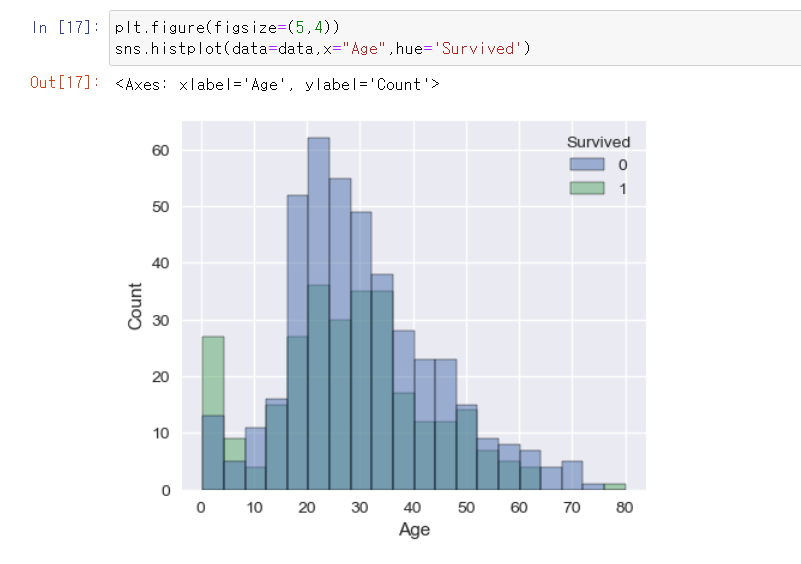

### displot, kdeplot
커널밀도추정 그래프: 히스토그램 연속적으로 곡선 연결   
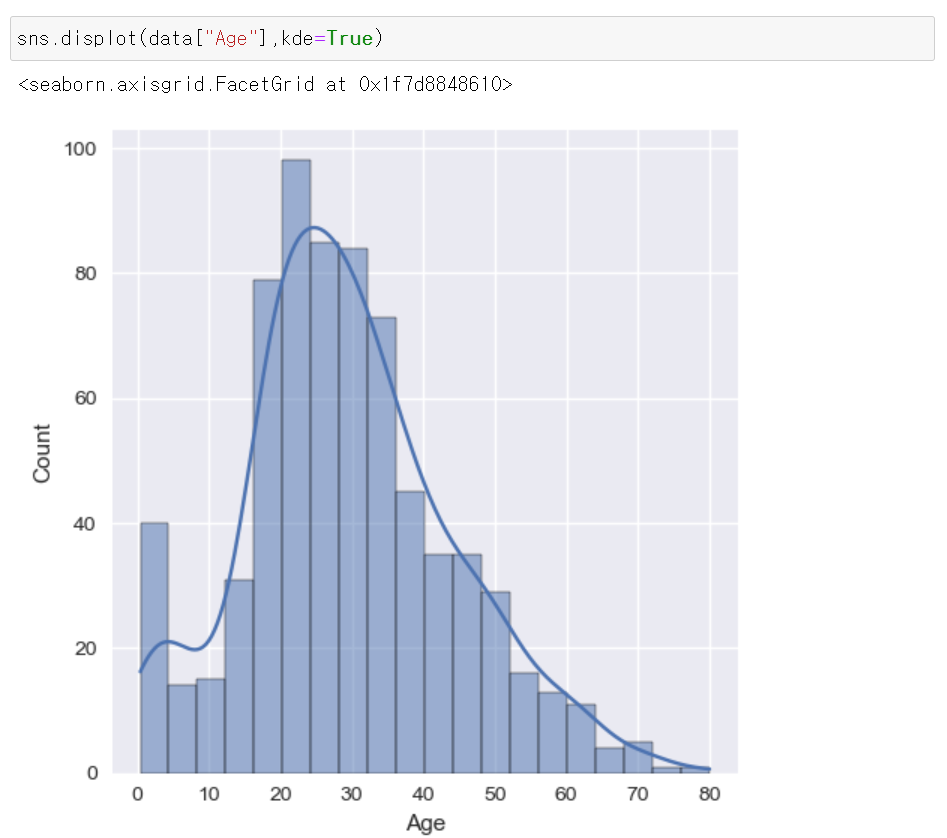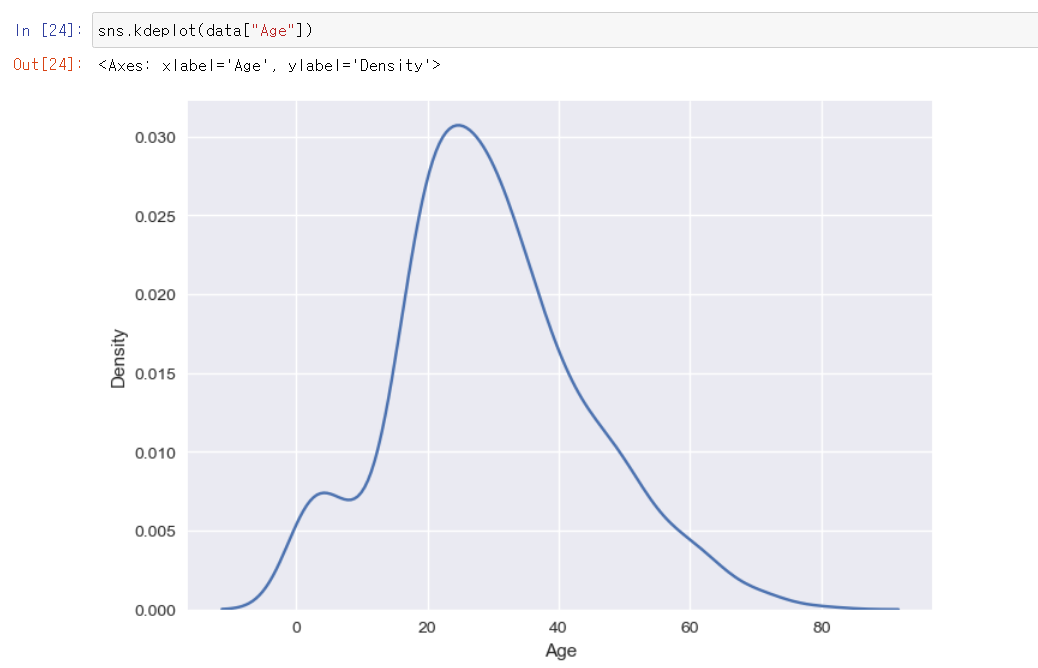

### barplot, pointplot
bar: 범주형 데이터 값 x에 따른 수치형 데이터 값 y의 평균값 제공   
point: 모양만 다름   
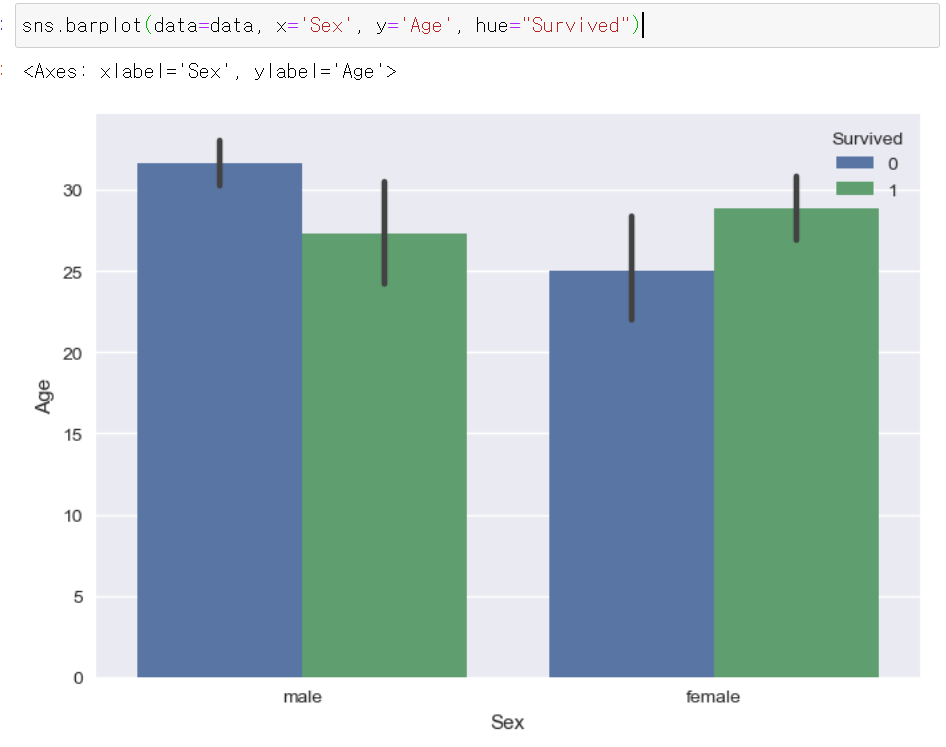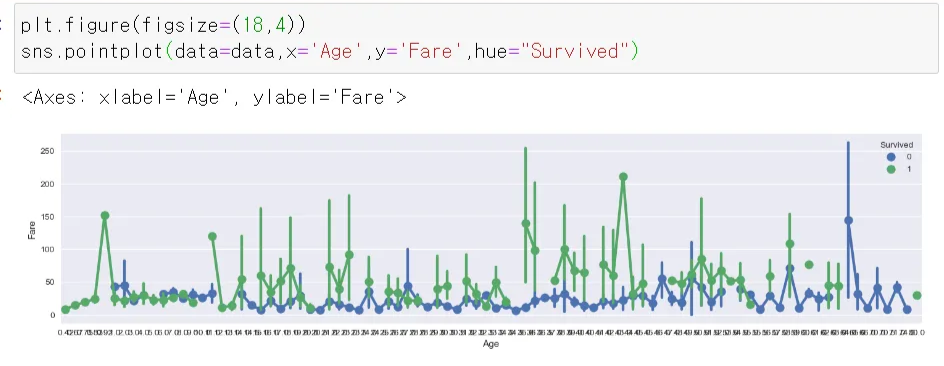

### scatterplot
산점도 그래프: 두 연속형 변수 간 관계 시각화   
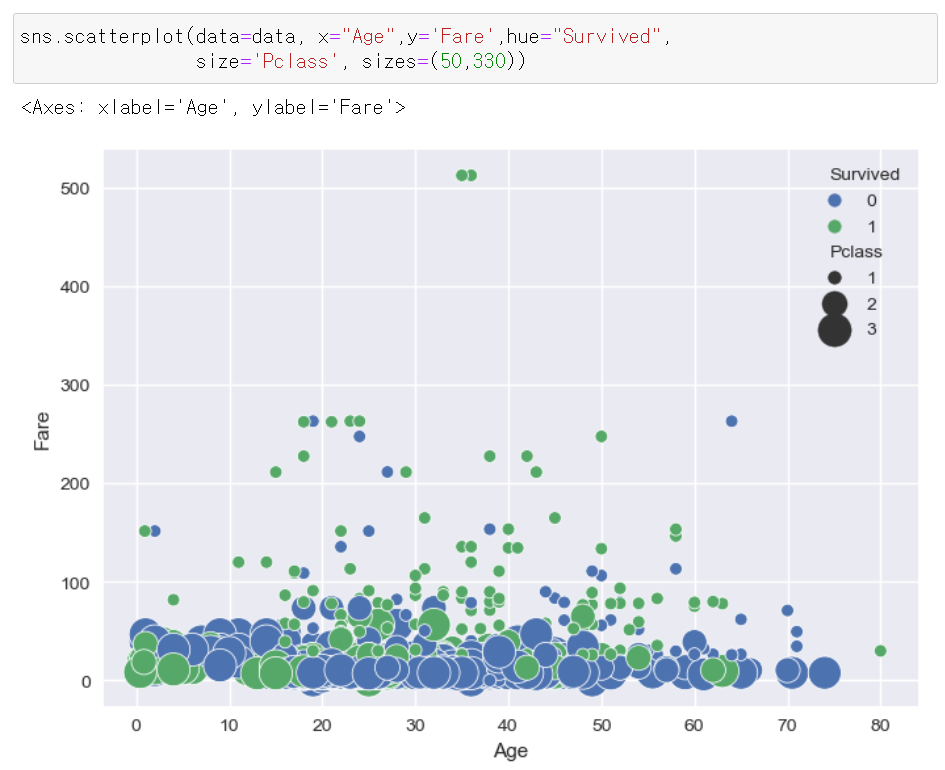

### regplot
회귀선 추가된 산점도 그래프: 산점도와 회귀선 같이 나타냄   
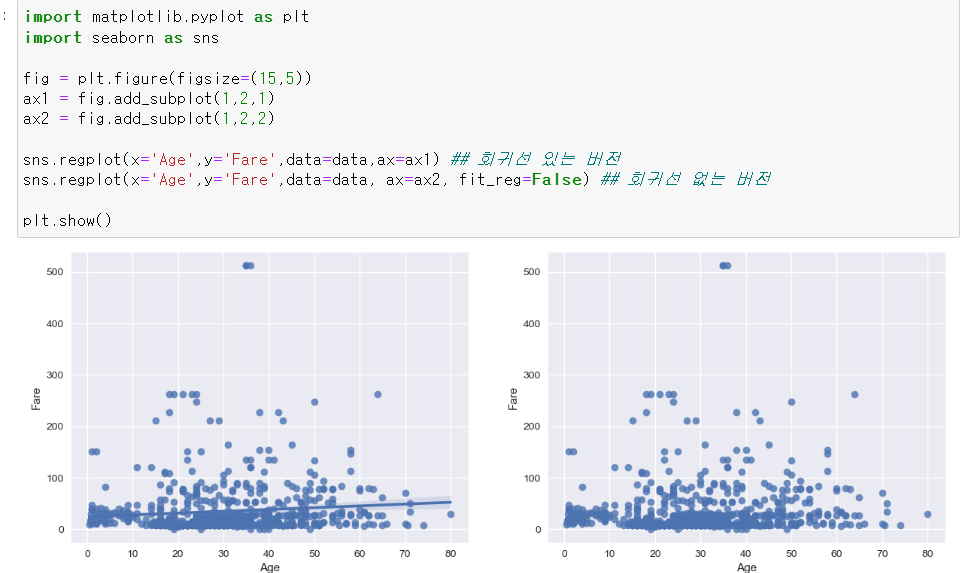

### catplot
수치형 데이터/범주형 데이터 관계 파악   
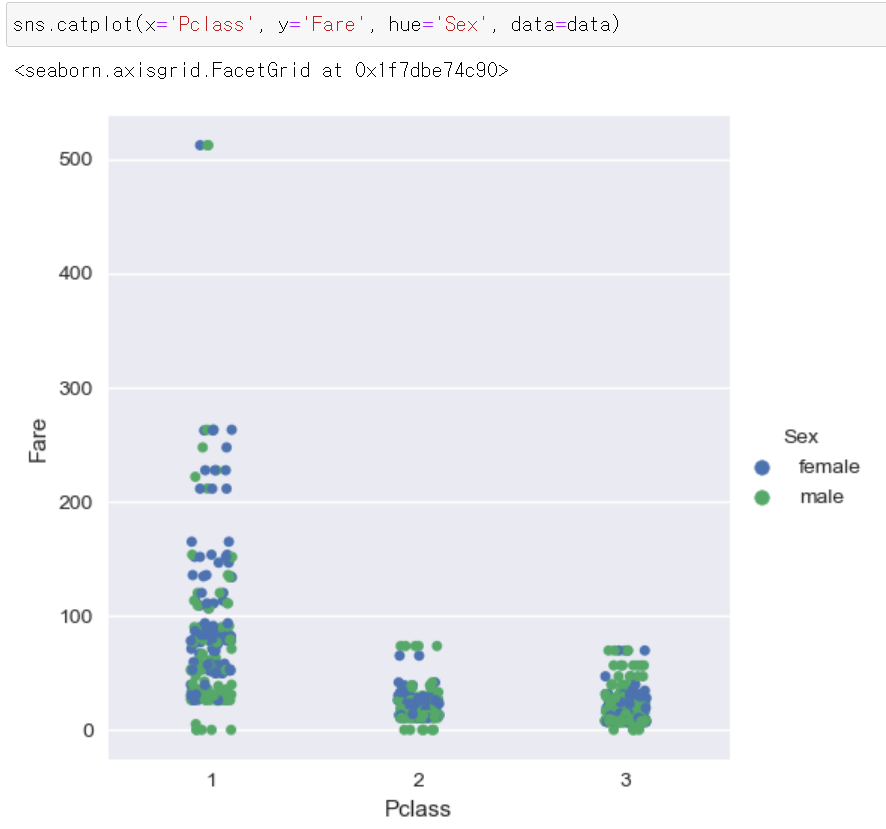

### pieplot
데이터의 부분과 전체 간의 비율 표현   
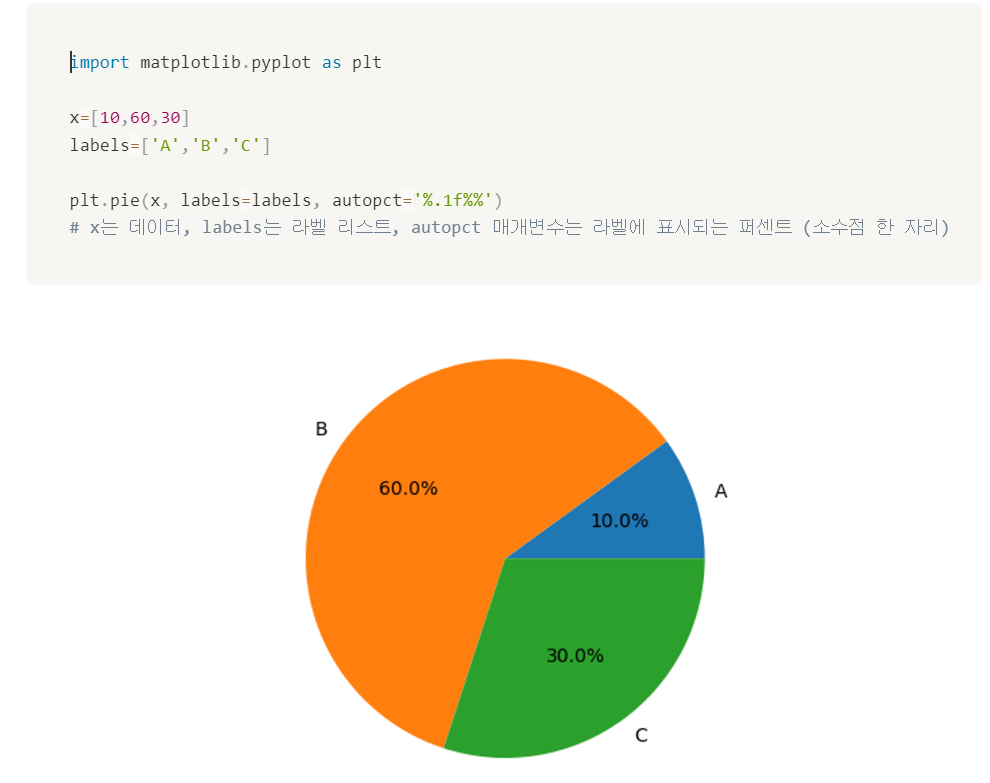

### heatmap
변수별 상관계수 직관적 시각화
```python
sns.heatmap(df.corr(),annot=True)
```
상관계수? 두 수치형 변수 사이의 상관 관계의 정도를 수치적으로 나타낸 계수   
- 음의 상관계수(-1에 가까움): 반비례
- 양의 상관계수: 비례

### violinplot
박스 플롯+커널밀도추정 그래프
```python
sns.violinplot(x='class', y='age', data=data)
```
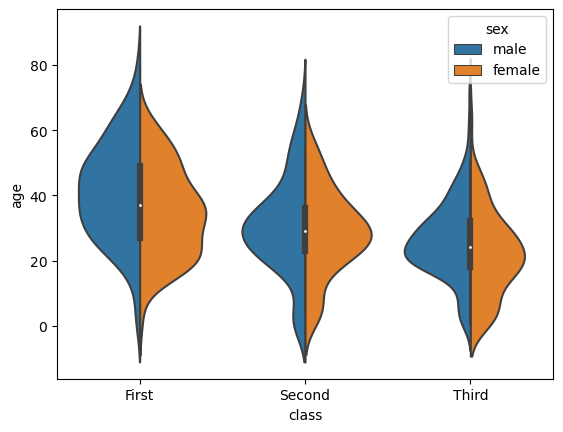

### pairplot
여러 그래프 한 번에
1. 설정
ax[i]에 각 그래프 할당
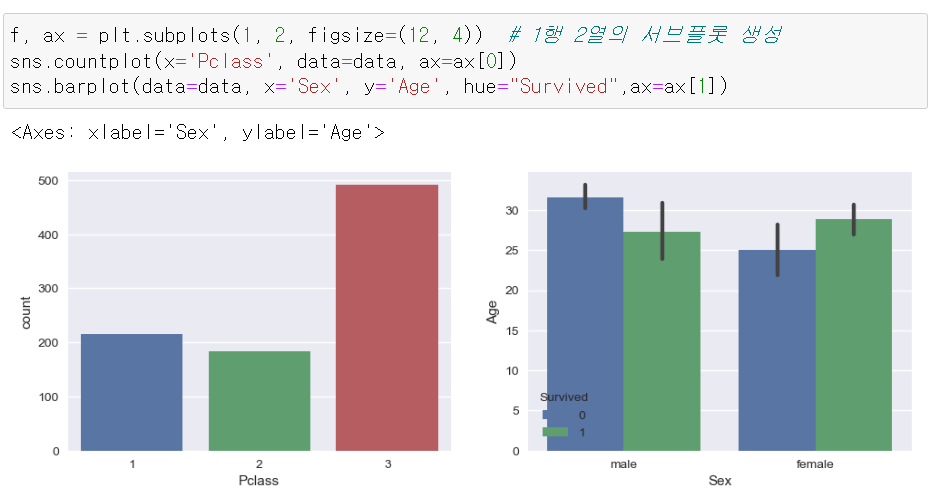

2.   
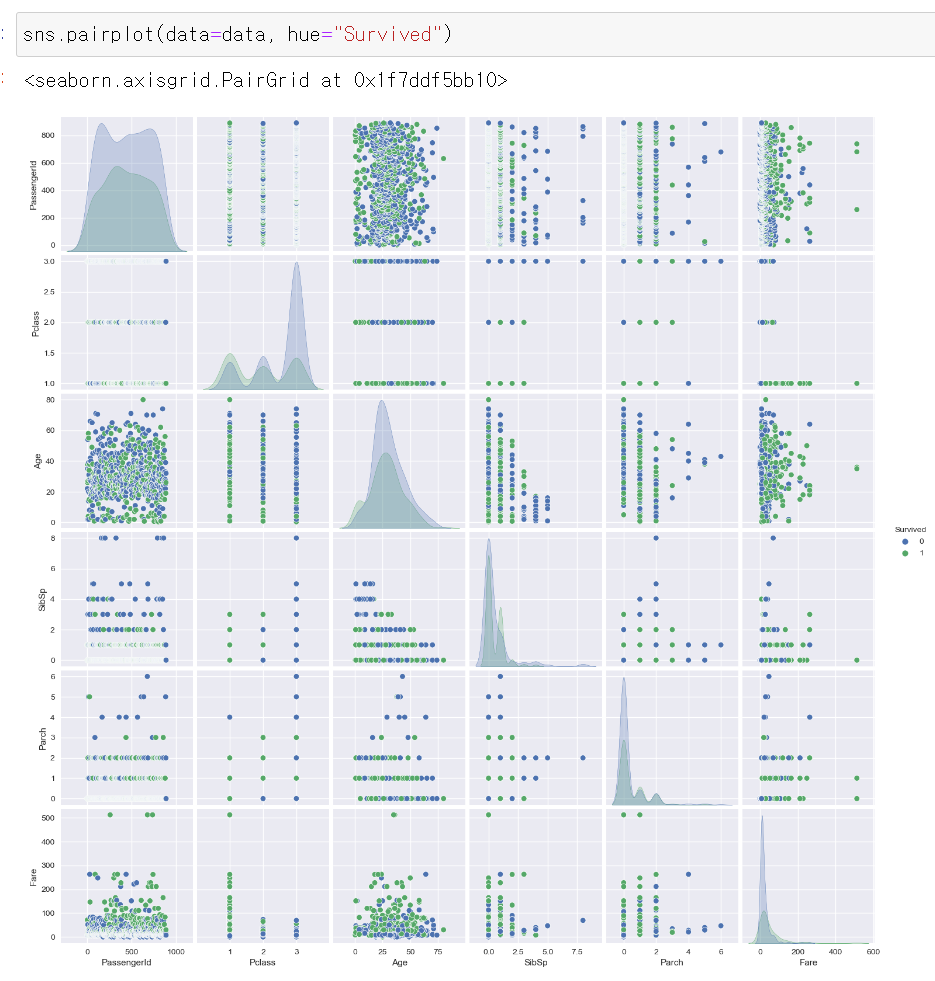